In [2]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'AXISBANK.NS'

# Fetch stock data
stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[['Open', 'High', 'Low', 'Close']]

# Normalize data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(stk_data)
data_normalized = pd.DataFrame(data_normalized, columns=["Open", "High", "Low", "Close"])

# Split data into train and test sets
test_obs = 29
train = data_normalized[:-test_obs]
test = data_normalized[-test_obs:]

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Fit the VARMA model
warnings.filterwarnings("ignore")
best_aic = float("inf")
best_order = None
best_model = None

for p in range(1, 6):
    for q in range(1, 6):
        try:
            model = VARMAX(train, order=(p, q))
            results = model.fit(disp=False)
            print(f'Order (p, q) = ({p}, {q})')
            print('AIC: ', results.aic)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, q)
                best_model = results
        except Exception as e:
            continue

print(f'Best order: {best_order}, AIC: {best_aic}')

Order (p, q) = (1, 1)
AIC:  462691.1703356287
Order (p, q) = (1, 2)
AIC:  -1998.0172001392957
Order (p, q) = (1, 3)
AIC:  -1974.3580990669411
Order (p, q) = (1, 4)
AIC:  -1944.872289571796
Order (p, q) = (1, 5)
AIC:  224083.62974417684
Order (p, q) = (2, 1)
AIC:  -2011.1661952295076
Order (p, q) = (2, 2)
AIC:  5180.679280265756
Order (p, q) = (2, 3)
AIC:  -1955.9684403499632
Order (p, q) = (2, 4)
AIC:  -1937.9183272347395
Order (p, q) = (3, 1)
AIC:  -1988.7264018396854
Order (p, q) = (3, 2)
AIC:  2727.9171504283345
Order (p, q) = (3, 3)
AIC:  -1927.5144527845664
Order (p, q) = (3, 4)
AIC:  3966.0657068346754
Order (p, q) = (3, 5)
AIC:  -1881.7477876640096
Order (p, q) = (4, 1)
AIC:  -1967.189848164462
Order (p, q) = (4, 2)
AIC:  -1936.601978844616
Order (p, q) = (4, 3)
AIC:  -1906.0541773478071
Order (p, q) = (4, 4)
AIC:  -1879.0120041364953
Order (p, q) = (4, 5)
AIC:  -1858.5220845631516
Best order: (2, 1), AIC: -2011.1661952295076


In [5]:
lagged_values = train.values[-best_order[0]:]
forecast = best_model.get_forecast(steps=test_obs).predicted_mean
forecast_df = pd.DataFrame(forecast, columns=["Open", "High", "Low", "Close"])

# Calculate performance metrics
rmse = mean_squared_error(test, forecast_df, squared=False)
mape = mean_absolute_percentage_error(test, forecast_df)

# Display performance metrics
performance = {
    "Model": ["VARMA"],
    "RMSE": [rmse],
    "MAPE": [mape],
    "Lag": [best_order],
    "Test": [test_obs]
}
perf = pd.DataFrame(performance)
print(perf)

   Model      RMSE          MAPE     Lag  Test
0  VARMA  0.305681  3.740527e+13  (2, 1)    29


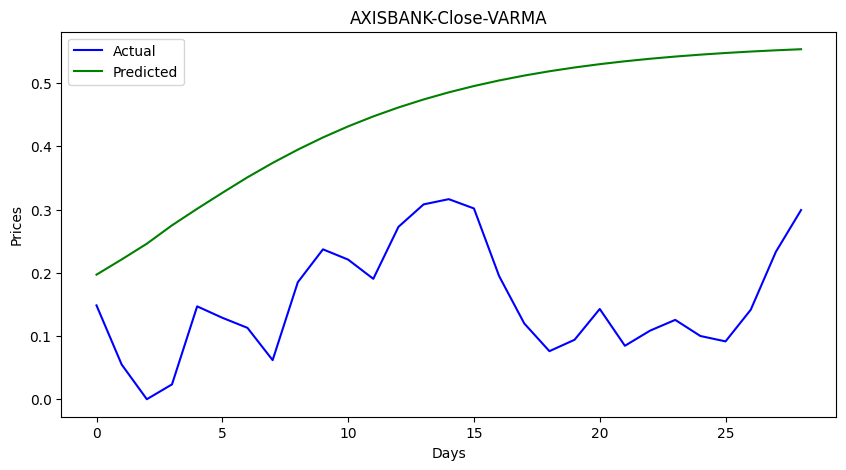

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(test["Close"].values, color='blue', label="Actual")
plt.plot(forecast_df["Close"].values, color='green', label="Predicted")
plt.title("AXISBANK-Close-VARMA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

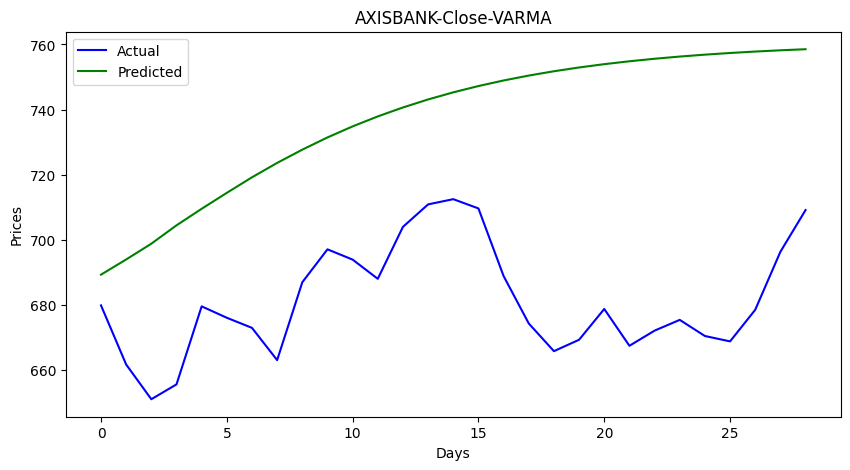

In [7]:
actual_stock_price_test_ori = scaler.inverse_transform(test)
actual_stock_price_test_ori_df = pd.DataFrame(actual_stock_price_test_ori, columns=["Open", "High", "Low", "Close"])

predicted_stock_price_test_ori = scaler.inverse_transform(forecast_df)
predicted_stock_price_test_ori_df = pd.DataFrame(predicted_stock_price_test_ori, columns=["Open", "High", "Low", "Close"])

# Plotting actual vs. predicted values on original scale
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_ori_df["Close"], color='blue', label="Actual")
plt.plot(predicted_stock_price_test_ori_df["Close"], color='green', label="Predicted")
plt.title("AXISBANK-Close-VARMA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [8]:
predicted_stock_price_test_ori_df

,Open,High,Low,Close
0,685.742878,693.427541,681.060280,689.329230
1,689.976566,696.875230,686.310041,693.996276
2,694.159320,702.190860,692.684635,698.831564
3,698.917085,706.931183,697.855607,704.466021
4,704.526989,712.202280,702.990361,709.544892
5,709.546055,717.345038,708.042485,714.437990
6,714.498031,722.291601,712.622838,719.208738
7,719.305672,727.045461,716.954437,723.620096
8,723.765341,731.507040,720.948922,727.694888
9,727.902803,735.619670,724.564965,731.441621


RMSE-Testset (Original): 59.9317814216285
MAPE-Testset (Original): 0.08216058182512029


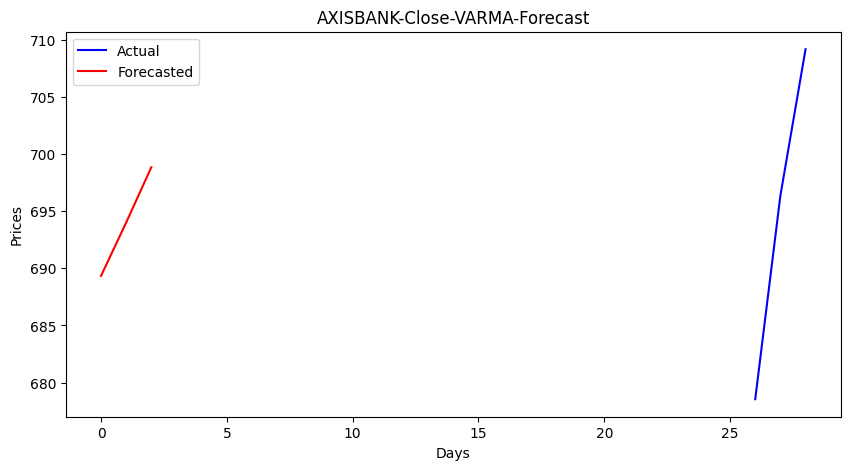

In [9]:
rmse_ori = mean_squared_error(actual_stock_price_test_ori_df["Close"], predicted_stock_price_test_ori_df["Close"], squared=False)
mape_ori = mean_absolute_percentage_error(actual_stock_price_test_ori_df["Close"], predicted_stock_price_test_ori_df["Close"])
print("RMSE-Testset (Original):", rmse_ori)
print("MAPE-Testset (Original):", mape_ori)

# Forecast future prices
forecast_steps = 3  # Adjust as needed
forecast_future = best_model.get_forecast(steps=forecast_steps).predicted_mean
forecast_future_df = pd.DataFrame(forecast_future, columns=["Open", "High", "Low", "Close"])

# Inverse transform future forecast to original scale
forecast_future_prices = scaler.inverse_transform(forecast_future_df)
forecast_future_prices_df = pd.DataFrame(forecast_future_prices, columns=["Open", "High", "Low", "Close"])

# Save forecasted prices
forecast_future_prices_df.to_csv("CloseVARMAForecast.csv", index=False)

# Plotting actual vs. forecasted future prices
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_ori_df["Close"].iloc[-forecast_steps:], color='blue', label="Actual")
plt.plot(forecast_future_prices_df["Close"], color='red', label="Forecasted")
plt.title("AXISBANK-Close-VARMA-Forecast")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [11]:
forecast_future_prices_df

,Open,High,Low,Close
0,685.742878,693.427541,681.060280,689.329230
1,689.976566,696.875230,686.310041,693.996276
2,694.159320,702.190860,692.684635,698.831564
